In [9]:
# Import necessary libraries
import pandas as pd

# Load individual datasets
# 1. Amazon Sale Report
amazon_sale_report = pd.read_csv('Amazon Sale Report.csv')

# 2. Cloud Warehouse Comparison Chart
cloud_warehouse_comparison = pd.read_csv('Cloud Warehouse Compersion Chart.csv')

# 3. Expense IIGF
expense_iigf = pd.read_csv('Expense IIGF.csv')

# 4. International Sale Report
international_sale_report = pd.read_csv('International sale Report.csv')

# 5. May 2022
may_2022 = pd.read_csv('May-2022.csv')

# 6. P & L March 2021
p_l_march_2021 = pd.read_csv('P  L March 2021.csv')

# 7. Sale Report
sale_report = pd.read_csv('Sale Report.csv')

# Display first few rows of each dataset
print("Amazon Sale Report:\n", amazon_sale_report.head())
print("\nCloud Warehouse Comparison Chart:\n", cloud_warehouse_comparison.head())
print("\nExpense IIGF:\n", expense_iigf.head())
print("\nInternational Sale Report:\n", international_sale_report.head())
print("\nMay 2022:\n", may_2022.head())
print("\nP & L March 2021:\n", p_l_march_2021.head())
print("\nSale Report:\n", sale_report.head())


<ipython-input-9-30e64e82d8dc>:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_sale_report = pd.read_csv('Amazon Sale Report.csv')


Amazon Sale Report:
    index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Se

In [10]:
# Step 2: Data Cleaning and Preparation

def standardize_columns(df):
    """Standardizes column names to lowercase and replaces spaces with underscores."""
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

# Standardize column names for all datasets
amazon_sale_report = standardize_columns(amazon_sale_report)
cloud_warehouse_comparison = standardize_columns(cloud_warehouse_comparison)
expense_iigf = standardize_columns(expense_iigf)
international_sale_report = standardize_columns(international_sale_report)
may_2022 = standardize_columns(may_2022)
p_l_march_2021 = standardize_columns(p_l_march_2021)
sale_report = standardize_columns(sale_report)

# Check for missing values in each dataset
def check_missing_values(df, name):
    print(f"\n{name} Missing Values:\n", df.isnull().sum())

check_missing_values(amazon_sale_report, "Amazon Sale Report")
check_missing_values(cloud_warehouse_comparison, "Cloud Warehouse Comparison Chart")
check_missing_values(expense_iigf, "Expense IIGF")
check_missing_values(international_sale_report, "International Sale Report")
check_missing_values(may_2022, "May 2022")
check_missing_values(p_l_march_2021, "P & L March 2021")
check_missing_values(sale_report, "Sale Report")

# Display cleaned datasets (first few rows for verification)
print("\nCleaned Amazon Sale Report:\n", amazon_sale_report.head())
print("\nCleaned Cloud Warehouse Comparison Chart:\n", cloud_warehouse_comparison.head())
print("\nCleaned Expense IIGF:\n", expense_iigf.head())
print("\nCleaned International Sale Report:\n", international_sale_report.head())
print("\nCleaned May 2022:\n", may_2022.head())
print("\nCleaned P & L March 2021:\n", p_l_march_2021.head())
print("\nCleaned Sale Report:\n", sale_report.head())



Amazon Sale Report Missing Values:
 index                     0
order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship-service-level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
b2b                       0
fulfilled-by          89698
unnamed:_22           49050
dtype: int64

Cloud Warehouse Comparison Chart Missing Values:
 index          0
shiprocket    29
unnamed:_1     9
increff       22
dtype: int64

Expense IIGF Missing Values:
 index              0
recived_amount    11
unnamed:_1        11
expance            2
unnamed:_3         0
dtype: int

In [11]:
# Step 3: Handle Missing Data

def handle_missing_data():
    global amazon_sale_report, cloud_warehouse_comparison, expense_iigf
    global international_sale_report, may_2022, p_l_march_2021, sale_report

    # Amazon Sale Report
    amazon_sale_report.drop(columns=['promotion-ids', 'fulfilled-by', 'unnamed:_22'], inplace=True)
    amazon_sale_report['currency'].fillna('INR', inplace=True)
    amazon_sale_report['amount'].fillna(amazon_sale_report['amount'].median(), inplace=True)
    amazon_sale_report['ship-city'].fillna('Unknown', inplace=True)
    amazon_sale_report['ship-state'].fillna('Unknown', inplace=True)
    amazon_sale_report['ship-postal-code'].fillna(0, inplace=True)
    amazon_sale_report['ship-country'].fillna('Unknown', inplace=True)

    # Cloud Warehouse Comparison Chart
    cloud_warehouse_comparison.fillna('Unknown', inplace=True)

    # Expense IIGF
    expense_iigf.fillna({'recived_amount': 0, 'expance': 'Unknown'}, inplace=True)

    # International Sale Report
    international_sale_report['rate'] = pd.to_numeric(international_sale_report['rate'], errors='coerce')
    international_sale_report['gross_amt'] = pd.to_numeric(international_sale_report['gross_amt'], errors='coerce')
    international_sale_report.fillna({'date': 'Unknown', 'months': 'Unknown',
                                      'customer': 'Unknown', 'style': 'Unknown',
                                      'sku': 'Unknown', 'size': 'Unknown',
                                      'pcs': 0, 'rate': international_sale_report['rate'].median(),
                                      'gross_amt': international_sale_report['gross_amt'].median()}, inplace=True)

    # Sale Report
    sale_report.fillna({'sku_code': 'Unknown', 'design_no.': 'Unknown',
                        'stock': 0, 'category': 'Unknown', 'size': 'Unknown',
                        'color': 'Unknown'}, inplace=True)

handle_missing_data()

# Check for missing values after handling

def check_missing_values(df, name):
    print(f"\n{name} Missing Values:\n", df.isnull().sum())

check_missing_values(amazon_sale_report, "Amazon Sale Report")
check_missing_values(cloud_warehouse_comparison, "Cloud Warehouse Comparison Chart")
check_missing_values(expense_iigf, "Expense IIGF")
check_missing_values(international_sale_report, "International Sale Report")
check_missing_values(may_2022, "May 2022")
check_missing_values(p_l_march_2021, "P & L March 2021")
check_missing_values(sale_report, "Sale Report")

# Display cleaned datasets (first few rows for verification)
print("\nCleaned Amazon Sale Report:\n", amazon_sale_report.head())
print("\nCleaned Cloud Warehouse Comparison Chart:\n", cloud_warehouse_comparison.head())
print("\nCleaned Expense IIGF:\n", expense_iigf.head())
print("\nCleaned International Sale Report:\n", international_sale_report.head())
print("\nCleaned May 2022:\n", may_2022.head())
print("\nCleaned P & L March 2021:\n", p_l_march_2021.head())
print("\nCleaned Sale Report:\n", sale_report.head())



Amazon Sale Report Missing Values:
 index                    0
order_id                 0
date                     0
status                   0
fulfilment               0
sales_channel            0
ship-service-level       0
style                    0
sku                      0
category                 0
size                     0
asin                     0
courier_status        6872
qty                      0
currency                 0
amount                   0
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
b2b                      0
dtype: int64

Cloud Warehouse Comparison Chart Missing Values:
 index         0
shiprocket    0
unnamed:_1    0
increff       0
dtype: int64

Expense IIGF Missing Values:
 index              0
recived_amount     0
unnamed:_1        11
expance            0
unnamed:_3         0
dtype: int64

International Sale Report Missing Values:
 index        0
date         0
months       0
customer     0
st

In [13]:
# Step 4: Merge Datasets

def merge_datasets():
    # Merge sales data with inventory data (based on SKU)
    merged_data = pd.merge(amazon_sale_report, sale_report, left_on='sku', right_on='sku_code', how='left')

    # Merge with pricing data from May 2022 and P & L March 2021
    merged_data = pd.merge(merged_data, may_2022, on='sku', how='left', suffixes=('_amazon', '_may2022'))
    merged_data = pd.merge(merged_data, p_l_march_2021, on='sku', how='left', suffixes=('', '_pl2021'))

    # Merge with international sales report
    merged_data = pd.merge(merged_data, international_sale_report, on='sku', how='left', suffixes=('', '_intl'))

    # Drop redundant columns
    columns_to_drop = ['index_x', 'index_intl', 'date_intl', 'months', 'customer', 'style_intl', 'size', 'pcs']
    merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns], inplace=True)

    # Resolve conflicts and clean final dataset
    merged_data['final_amount'] = merged_data['amount'] * merged_data['qty']
    merged_data.drop_duplicates(inplace=True)

    # Return the cleaned merged dataset
    return merged_data

merged_dataset = merge_datasets()

# Check the first few rows of the cleaned and merged dataset
print("\nCleaned and Merged Dataset:\n", merged_dataset.head())



Cleaned and Merged Dataset:
               order_id      date                        status fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
2  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
4  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
5  404-0687676-7273146  04-30-22                       Shipped     Amazon   
6  404-0687676-7273146  04-30-22                       Shipped     Amazon   

  sales_channel ship-service-level    style              sku category_x  \
0     Amazon.in           Standard   SET389   SET389-KR-NP-S        Set   
2     Amazon.in           Standard   SET389   SET389-KR-NP-S        Set   
4     Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL      kurta   
5     Amazon.in          Expedited  JNE3371    JNE3371-KR-XL      kurta   
6     Amazon.in          Expedited  JNE3371    JNE3371-KR-XL      kurta   

  size_x  ... amazon_mrp_pl2021 amazon_fba_mrp_pl2021  f


Summary Statistics:

                                date            qty         amount  \
count                         445869  445869.000000  445869.000000   
mean   2022-05-08 06:42:42.096041984       0.907323     630.920613   
min              2022-03-31 00:00:00       0.000000       0.000000   
25%              2022-04-17 00:00:00       1.000000     435.000000   
50%              2022-05-03 00:00:00       1.000000     605.000000   
75%              2022-05-30 00:00:00       1.000000     788.000000   
max              2022-06-29 00:00:00      15.000000    5584.000000   
std                              NaN       0.309553     265.670001   

       ship-postal-code        index_y          stock  index  index_pl2021  \
count     445869.000000  438139.000000  438139.000000    0.0           0.0   
mean      464273.358204    5200.314738     124.022144    NaN           NaN   
min            0.000000       1.000000       0.000000    NaN           NaN   
25%       382421.000000    3360.000

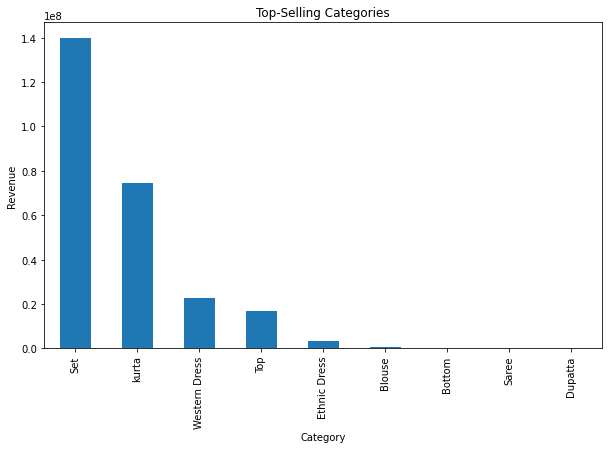

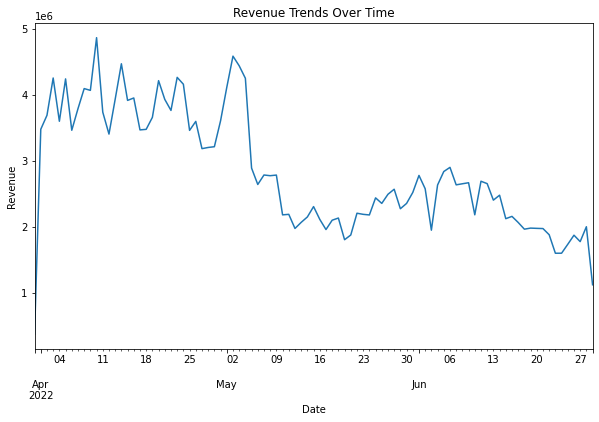


Processed dataset saved as 'cleaned_merged_dataset.csv'


In [15]:
# Step 5: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt 
# 1. Summary Statistics
print("\nSummary Statistics:\n")
print(merged_dataset.describe())

# 2. Top-Selling Categories
category_sales = merged_dataset.groupby('category_x')['final_amount'].sum().sort_values(ascending=False)
print("\nTop-Selling Categories:\n", category_sales)

# 3. Revenue Trends
merged_dataset['date'] = pd.to_datetime(merged_dataset['date'], errors='coerce')
revenue_trends = merged_dataset.groupby('date')['final_amount'].sum()

# 4. Visualizations
# Top-Selling Categories
category_sales.plot(kind='bar', figsize=(10, 6), title='Top-Selling Categories', xlabel='Category', ylabel='Revenue')
plt.show()

# Revenue Trends
revenue_trends.plot(kind='line', figsize=(10, 6), title='Revenue Trends Over Time', xlabel='Date', ylabel='Revenue')
plt.show()

# Save processed dataset for future use
merged_dataset.to_csv('cleaned_merged_dataset.csv', index=False)
print("\nProcessed dataset saved as 'cleaned_merged_dataset.csv'")


In [1]:
from IPython.display import IFrame

# Replace 'YOUR_SECURE_EMBED_LINK' with the link you copied
iframe_url = "https://app.powerbi.com/groups/me/reports/9aa896c3-14d1-4262-acad-644f18b910fa/f12a4c875f655f85b352?bookmarkGuid=ba651677-eebe-442d-9599-39f2663fec93&bookmarkUsage=1&ctid=4ddd393a-e98a-4404-841f-c4becdd925a5&portalSessionId=97f9edfc-cdf3-491e-bd94-7833dba61d74&fromEntryPoint=export"

# Embed the Power BI report
display(IFrame(src=iframe_url, width=900, height=600))

In [2]:
from IPython.display import HTML

# Replace 'YOUR_SECURE_EMBED_LINK' with the link you copied from Power BI
secure_link = "https://app.powerbi.com/groups/me/reports/9aa896c3-14d1-4262-acad-644f18b910fa/f12a4c875f655f85b352?bookmarkGuid=ba651677-eebe-442d-9599-39f2663fec93&bookmarkUsage=1&ctid=4ddd393a-e98a-4404-841f-c4becdd925a5&portalSessionId=97f9edfc-cdf3-491e-bd94-7833dba61d74&fromEntryPoint=export"


# Display a clickable link to open the Power BI dashboard
HTML(f'<a href="{secure_link}" target="_blank">Click here to view the Power BI Dashboard</a>')
